# DeePMD-kit Quick Start Tutorial

<a href="https://nb.bohrium.dp.tech/detail/3313403083" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2024 @ Authors</i></b><br/>
        📖 <b>Getting Started Guide</b><br/>
        Licensing Agreement: This work is licensed under the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.<br/>
       This document can be executed directly on the <a style="font-weight:bold; color:rgb(85, 91, 228)" href="https://bohrium-doc.dp.tech/docs/userguide/Notebook" target="_blank"> Bohrium Notebook</a>. To begin, click the  <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">Connect</span>  button located at the top of the interface. We have already set up the recommended image <b><u>DeePMD-kit:2.2.1-cuda11.6-notebook</u></b> and the recommended machine type <b><u>c32_m64_cpu</u></b> for you.
    </p>
</div>

![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/150/984dd8b9011c48dd85ae0dbe0dd52b16/950eebf7-2322-46fe-8def-e6ae69ed8ce5.png)

<p style="color:purple; font-weight:bold">This is a quick start guide for "Deep Potential" molecular dynamics using DeePMD-kit, through which you can quickly understand the paradigm cycle that DeePMD-kit operates in and apply it to your projects.</p>

<p>Deep Potential is the convergence of machine learning and physical principles, presenting a new computational paradigm as shown in the figure below.</p>
<div style="text-align: center;">
    <img src="https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/static/mdkit/DPMD1.svg" alt="Fig2" style="zoom: 75%;">
    <p style='font-size:0.8rem; font-weight:bold'>Figure | A new computational paradigm, composed of Molecular Modeling, Machine Learning, and High-Performance Computing (HPC).</p>
</div>


## Task

> **Mastering the paradigm cycle of using DeePMD-kit to establish deep potential molecular dynamics models, and following a complete case to learn how to apply it to molecular dynamics tasks.**

By the end of this tutorial, you will be able to:

* Prepare the formataive dataset and running scripts for training with DeePMD-kit;
* Train, freeze, and test DeePMD-kit models;
* Use DeePMD-kit in Lammps for calculations;

Work through this tutorial. It will take you 20 minutes, max!

## Table of contents

<div align="left" style="margin:rem;"><img src="https://docs.deepmodeling.com/projects/deepmd/en/master/_static/logo.svg" alt="deepmd-kit" style="width:20rem;"></div>

* [Background](#background)
* [Practice](#practice)
    * [1. Data preparation](#dataprepare)
    * [2. Prepare input script](#inputscript)
    * [3. Train a model](#train)
    * [4. Freeze a model](#freeze)
    * [5. Compress a model](#compress)
    * [6. Test a model](#test)
    * [7. Run MD with LAMMPS](#lammpsmd)
* [References](#references)


## Background <a id ='background'></a>

In this tutorial, we will take the gaseous methane molecule as an example to provide a detailed introduction to the training and application of the Deep Potential (DP) model.

DeePMD-kit is a software tool that employs neural networks to fit potential energy models based on first-principles data for molecular dynamics simulations. Without manual intervention, it can end-to-end transform the data provided by users into a deep potential model in a matter of hours. This model can seamlessly integrate with common molecular dynamics simulation software (like LAMMPS, OpenMM, and GROMACS).

DeePMD-kit significantly elevates the limits of molecular dynamics through high-performance computing and machine learning, achieving system scales of up to hundreds of millions of atoms while still maintaining the high accuracy of "ab initio" calculations. The simulation time scale is improved by at least 1000 times compared to traditional methods. Its achievements earned the 2020 ACM Gordon Bell Prize, one of the highest honors in the field of high-performance computing, and it has been used by over a thousand research groups in physics, chemistry, materials science, biology, and other fields globally.

<img src="https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/static/mdkit/DPMD_Time_and_Size_Scales.svg" alt="Fig1" style="zoom: 75%;">

For more detailed usage, you can refer to the [DeePMD-kit’s documentation](https://docs.deepmodeling.org/projects/deepmd/en/master/index.html) as a comprehensive reference.

In this case, the Deep Potential (DP) model was generated using the **DeePMD-kit package (v2.2.1)**.



## Practice <a id ='practice'></a>

### 1 Data Preparation <a id ='dataprepare'></a>

We have prepared the initial data for $CH_4$ required to run DeePMD-kit computations and placed it in the `DeePMD-kit_Tutorial` folder. You can view the corresponding files by clicking on the dataset on the left side:

In [4]:
# For security reasons, we do not have write permission to the dataset folder, so we copy it to the `/data/` directory:
! cp -nr /bohr/ /personal/

# Here, we define some paths and switch to the working path for ease of subsequent calls:
import os
bohr_dataset_url = "/bohr/DeePMD-kit-Tutorial-21f1/v1/"  # The URL can be copied from the dataset section on the left.
work_path = os.path.join("/personal", bohr_dataset_url[1:])  # A slice operation is used to remove the leading "/" from the path.
os.chdir(work_path)
print(f"Current path is: {os.getcwd()}")


Current path is: /personal/bohr/DeePMD-kit-Tutorial-21f1/v1


Let's take a look at the downloaded DeePMD-kit_Tutorial folder.

In [5]:
! tree DeePMD-kit_Tutorial -L 1

DeePMD-kit_Tutorial
├── 00.data
├── 01.train
├── 01.train.finished
├── 02.lmp
└── 02.lmp.finished

5 directories, 0 files


There are 3 subfolders under the DeePMD-kit_Tutorial folder: 00.data, 01.train, and 02.lmp.

- The 00.data folder is used to store training and testing data.
- The 01.train folder contains example scripts for training models using DeePMD-kit.
- The 01.train.finished folder includes the complete results of the training process.
- The 02.lmp folder contains example scripts for molecular dynamics simulations using LAMMPS.

Let's first take a look at the DeePMD-kit_Tutorial/00.data folder.

In [6]:
! tree DeePMD-kit_Tutorial/00.data -L 1

DeePMD-kit_Tutorial/00.data
├── abacus_md
├── training_data
└── validation_data

3 directories, 0 files


DeePMD-kit's training data originates from first-principles calculation data, including atomic types, simulation cells, atomic coordinates, atomic forces, system energies, and virials.

<div align="left" style="margin:1.5rem"><img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465518300882-gr1_lrg.jpg" alt="image-20230116161737203" style="zoom: 25%;"></div>

In the *00.data* folder, there is only the *abacus_md* folder, which contains data obtained through *ab initio* Molecular Dynamics (AIMD) simulations using ABACUS. In this tutorial, we have already completed the *ab initio* molecular dynamics calculations for the methane molecule for you.

Detailed information about ABACUS can be found in its [documentation](https://abacus.deepmodeling.com/en/latest/). 

DeePMD-kit uses a compressed data format. All training data should first be converted into this format before they can be used in DeePMD-kit. This data format is explained in detail in the DeePMD-kit manual, which can be found on [DeePMD-kit's Github](http://www.github.com/deepmodeling/deepmd-kit).

We provide a convenient tool **dpdata**, which can convert data generated by VASP, CP2K, Gaussian, Quantum Espresso, ABACUS, and LAMMPS into DeePMD-kit's compressed format.

A snapshot of a molecular system that contains computational data information is called a frame. A data system comprises many frames sharing the same number of atoms and atom types.

For example, a molecular dynamics trajectory can be converted into a data system, where each timestep corresponds to one frame in the system.


Next, we use the dpdata tool to randomly split the data in abacus_md into training and validation data.


In [7]:
import dpdata 
import numpy as np

# load data of abacus/md format
data = dpdata.LabeledSystem('DeePMD-kit_Tutorial/00.data/abacus_md', fmt = 'abacus/md') 
print('# the data contains %d frames' % len(data))

# random choose 40 index for validation_data
index_validation = np.random.choice(201,size=40,replace=False)

# other indexes are training_data
index_training = list(set(range(201))-set(index_validation))
data_training = data.sub_system(index_training)
data_validation = data.sub_system(index_validation)

# all training data put into directory:"training_data"
data_training.to_deepmd_npy('DeePMD-kit_Tutorial/00.data/training_data')

# all validation data put into directory:"validation_data"
data_validation.to_deepmd_npy('DeePMD-kit_Tutorial/00.data/validation_data')

print('# the training data contains %d frames' % len(data_training)) 
print('# the validation data contains %d frames' % len(data_validation)) 

# the data contains 201 frames
# the training data contains 161 frames
# the validation data contains 40 frames


As you can see, 161 frames are picked as training data, and the other 40 frames are validation dat.

Let's take another look at the 00.data folder, where new files have been generated, which are the training and validation sets required for Deep Potential training with DeePMD-kit.


In [8]:
! tree DeePMD-kit_Tutorial/00.data/ -L 1

DeePMD-kit_Tutorial/00.data/
├── abacus_md
├── training_data
└── validation_data

3 directories, 0 files


In [9]:
! tree DeePMD-kit_Tutorial/00.data/training_data -L 1

DeePMD-kit_Tutorial/00.data/training_data
├── set.000
├── type.raw
└── type_map.raw

1 directory, 2 files


The functions of these files are as follows:

- set.000: It is a directory that contains compressed format data (NumPy compressed arrays).
- type.raw: It is a file that contains the types of atoms (represented as integers).
- type_map.raw: It is a file that contains the names of the types of atoms.

Let's take a look at these files.

Let's have a look at `type.raw`:

In [10]:
! cat DeePMD-kit_Tutorial/00.data/training_data/type.raw 

0
0
0
0
1


This tells us there are 5 atoms in this example, 4 atoms represented by type "0", and 1 atom represented by type "1".
Sometimes one needs to map the integer types to atom name. The mapping can be given by the file `type_map.raw`

In [11]:
! cat DeePMD-kit_Tutorial/00.data/training_data/type_map.raw

H
C


This tells us the type "0" is named by "H", and the type "1" is named by "C".

More detailed documentation on using dpdata for data conversion can be found [here](https://docs.deepmodeling.org/projects/deepmd/en/master/data/data-conv.html)

### 2 Prepare input script  <a id ='inputscript'></a>
Once the data preparation is done, we can go on with training. Now go to the training directory.
DeePMD-kit requires a `json` format file to specify parameters for training. 

In [12]:
! cd DeePMD-kit_Tutorial/01.train/ && cat input.json

{
    "_comment": " model parameters",
    "model": {
	"type_map":	["H", "C"],
	"descriptor" :{
	    "type":		"se_e2_a",
	    "sel":		"auto",
	    "rcut_smth":	0.50,
	    "rcut":		6.00,
	    "neuron":		[25, 50, 100],
	    "resnet_dt":	false,
	    "axis_neuron":	16,
	    "seed":		1,
	    "_comment":		" that's all"
	},
	"fitting_net" : {
	    "neuron":		[240, 240, 240],
	    "resnet_dt":	true,
	    "seed":		1,
	    "_comment":		" that's all"
	},
	"_comment":	" that's all"
    },

    "learning_rate" :{
	"type":		"exp",
	"decay_steps":	50,
	"start_lr":	0.001,	
	"stop_lr":	3.51e-8,
	"_comment":	"that's all"
    },

    "loss" :{
	"type":		"ener",
	"start_pref_e":	0.02,
	"limit_pref_e":	1,
	"start_pref_f":	1000,
	"limit_pref_f":	1,
	"start_pref_v":	0,
	"limit_pref_v":	0,
	"_comment":	" that's all"
    },

    "training" : {
	"training_data": {
	    "systems":     ["../00.data/training_data"],
	    "batch_size":  "auto",
	    "_comment":	   "that's all"
	},
	"validation_data":{
	    "systems

DeePMD-kit requires a `json` format file to specify parameters for training. 

In the model section, the parameters of embedding and fitting networks are specified.
```json
"model":{
    "type_map":    ["H", "C"],                 
    "descriptor":{
        "type":            "se_e2_a",          
        "rcut":            6.00,               
        "rcut_smth":       0.50,               
        "sel":             "auto",             
        "neuron":          [25, 50, 100],       
        "resnet_dt":       false,
        "axis_neuron":     16,                  
        "seed":            1,
        "_comment":        "that's all"
        },
    "fitting_net":{
        "neuron":          [240, 240, 240],    
        "resnet_dt":       true,
        "seed":            1,
        "_comment":        "that's all"
    },
    "_comment":    "that's all"'
},
```
The explanation for some of the parameters is as follows:

| Parameter                | Expiation                                                    |
| ------------------------ | ------------------------------------------------------------ |
| type_map                 | *the* *name* *of* *each* *type* *of* *atom*                  |
| descriptor > type        | *the* *type* *of* *descriptor*                               |
| descriptor > rcut        | *cut-off* *radius*                                           |
| descriptor > rcut_smth   | *where* *the* *smoothing* *starts*                           |
| descriptor > sel         | *the* *maximum* *number* *of* *type* *i* *atoms* *in* *the* *cut-off* *radius* |
| descriptor > neuron      | *size* *of* *the* *embedding* *neural* *network*             |
| descriptor > axis_neuron | *the* *size* *of* *the* *submatrix* *of* *G* *(embedding* *matrix)* |
| fitting_net > neuron     | *size* *of* *the* *fitting* *neural* *network*               |

The `se_e2_a` descriptor is used to train the DP model. The item neurons set the size of the descriptors and fitting network to [25, 50, 100] and [240, 240, 240], respectively. The components in local environment to smoothly go to zero from 0.5 to 6 Å.

The following are the parameters that specify the learning rate and loss function.
```json
    "learning_rate" :{
        "type":                "exp",
        "decay_steps":         50,
        "start_lr":            0.001,    
        "stop_lr":             3.51e-8,
        "_comment":            "that's all"
    },
    "loss" :{
        "type":                "ener",
        "start_pref_e":        0.02,
        "limit_pref_e":        1,
        "start_pref_f":        1000,
        "limit_pref_f":        1,
        "start_pref_v":        0,
        "limit_pref_v":        0,
        "_comment":            "that's all"
    },
```
In the loss function, `pref_e` increases from 0.02 to 1, and `pref_f` decreases from 1000 to 1  progressively, which means that the force term dominates at the beginning, while energy and virial terms become important at the end. This strategy is very effective and reduces the total training time. `pref_v` is set to 0 , indicating that no virial data are included in the training process. The starting learning rate, stop learning rate, and decay steps are set to 0.001, 3.51e-8, and 50, respectively. The model is trained for 10000 steps.

The training parameters are given in the following
```json
    "training" : {
        "training_data": {
            "systems":            ["../00.data/training_data"],     
            "batch_size":         "auto",                       
            "_comment":           "that's all"
        },
        "validation_data":{
            "systems":            ["../00.data/validation_data/"],
            "batch_size":         "auto",               
            "numb_btch":          1,
            "_comment":           "that's all"
        },
        "numb_steps":             10000,                           
        "seed":                   10,
        "disp_file":              "lcurve.out",
        "disp_freq":              200,
        "save_freq":              10000,
        },
```

More detailed docs about Data conversion can be found [here](https://docs.deepmodeling.org/projects/deepmd/en/master/data/data-conv.html)

### 3 Train a model  <a id ='train'></a>
After the training script is prepared, we can start the training with DeePMD-kit by simply running

In [13]:
# ########## Time Warning: 120 secs ##########
! cd DeePMD-kit_Tutorial/01.train/ && dp train input.json

Instructions for updating:
non-resource variables are not supported in the long term
/opt/deepmd-kit-2.2.1/lib/python3.10/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)
DEEPMD INFO    Calculate neighbor statistics... (add --skip-neighbor-stat to skip this step)
2024-03-14 21:43:34.555220: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-14 21:43:34.555262: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0-31
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 3

On the screen, you will see the information of the data system(s)

```
DEEPMD INFO    -----------------------------------------------------------------
DEEPMD INFO    ---Summary of DataSystem: training     ----------------------------------
DEEPMD INFO    found 1 system(s):
DEEPMD INFO                                 system  natoms  bch_sz   n_bch   prob  pbc
DEEPMD INFO               ../00.data/training_data       5       7      23  1.000    T
DEEPMD INFO    -------------------------------------------------------------------------
DEEPMD INFO    ---Summary of DataSystem: validation   ----------------------------------
DEEPMD INFO    found 1 system(s):
DEEPMD INFO                                 system  natoms  bch_sz   n_bch   prob  pbc
DEEPMD INFO             ../00.data/validation_data       5       7       5  1.000    T
DEEPMD INFO    -------------------------------------------------------------------------
```

and the starting and final learning rate of this training

```
DEEPMD INFO    start training at lr 1.00e-03 (== 1.00e-03), decay_step 50, decay_rate 0.950006, final lr will be 3.51e-08
```

If everything works fine, you will see, on the screen, information printed every 1000 steps, like

```
DEEPMD INFO    batch     200 training time 6.04 s, testing time 0.02 s
DEEPMD INFO    batch     400 training time 4.80 s, testing time 0.02 s
DEEPMD INFO    batch     600 training time 4.80 s, testing time 0.02 s
DEEPMD INFO    batch     800 training time 4.78 s, testing time 0.02 s
DEEPMD INFO    batch    1000 training time 4.77 s, testing time 0.02 s
DEEPMD INFO    saved checkpoint model.ckpt
DEEPMD INFO    batch    1200 training time 4.47 s, testing time 0.02 s
DEEPMD INFO    batch    1400 training time 4.49 s, testing time 0.02 s
DEEPMD INFO    batch    1600 training time 4.45 s, testing time 0.02 s
DEEPMD INFO    batch    1800 training time 4.44 s, testing time 0.02 s
DEEPMD INFO    batch    2000 training time 4.46 s, testing time 0.02 s
DEEPMD INFO    saved checkpoint model.ckpt
```

They present the training and testing time counts. At the end of the 1000th batch, the model is saved in Tensorflow's checkpoint file `model.ckpt`. At the same time, the training and testing errors are presented in file `lcurve.out`. 

The file contains 8 columns, form left to right, are the training step, the validation loss, training loss, root mean square (RMS) validation error of energy, RMS training error of energy, RMS validation error of force, RMS training error of force and the learning rate. The RMS error (RMSE) of the energy is normalized by number of atoms in the system. 
```
head -n 2 lcurve.out
#  step      rmse_val    rmse_trn    rmse_e_val  rmse_e_trn    rmse_f_val  rmse_f_trn         lr
      0      2.02e+01    1.51e+01      1.37e-01    1.41e-01      6.40e-01    4.79e-01    1.0e-03
```
and
```
$ tail -n 2 lcurve.out
   9800      2.45e-02    4.02e-02      3.20e-04    3.88e-04      2.40e-02    3.94e-02    4.3e-08
  10000      4.60e-02    3.76e-02      8.65e-04    5.35e-04      4.52e-02    3.69e-02    3.5e-08
```
Volumes 4, 5 and 6, 7 present energy and force training and testing errors, respectively. 

In [14]:
! cd DeePMD-kit_Tutorial/01.train.finished/ && head -n 2 lcurve.out && tail -n 2 lcurve.out

#  step      rmse_val    rmse_trn    rmse_e_val  rmse_e_trn    rmse_f_val  rmse_f_trn         lr
# If there is no available reference data, rmse_*_{val,trn} will print nan
   9800      2.40e-02    2.82e-02      2.27e-04    3.77e-04      2.35e-02    2.76e-02    4.3e-08
  10000      3.82e-02    3.02e-02      6.48e-04    3.29e-04      3.75e-02    2.97e-02    3.5e-08


The loss function can be visualized to monitor the training process.

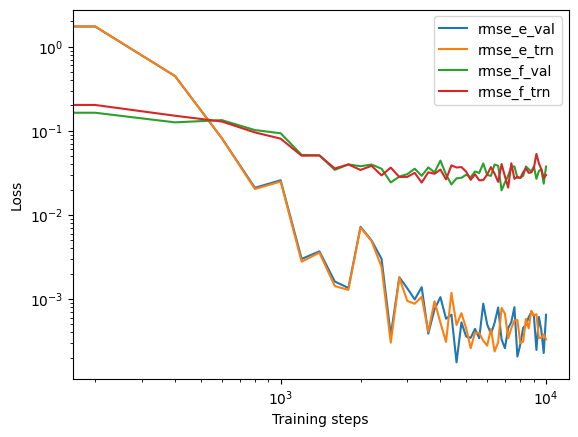

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
with open("./DeePMD-kit_Tutorial/01.train.finished/lcurve.out") as f:
    headers = f.readline().split()[1:]
lcurve = pd.DataFrame(np.loadtxt("./DeePMD-kit_Tutorial/01.train.finished/lcurve.out"), columns =  headers    )
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val" , "rmse_f_trn" ]
for legend in legends:
    plt.loglog(lcurve["step"], lcurve[legend], label = legend )
plt.legend()
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()

### 4 Freeze a model <a id ='freeze'></a>

At the end of the training, the model parameters saved in TensorFlow's checkpoint file should be frozen as a model file that is usually ended with extension .pb. Simply execute

In [16]:
## Navigate to the DeePMD-kit_Tutorial/01.train/ Directory to Train and Freeze the Model
! cd DeePMD-kit_Tutorial/01.train.finished/ && dp freeze -o graph.pb

Instructions for updating:
non-resource variables are not supported in the long term
/opt/deepmd-kit-2.2.1/lib/python3.10/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)
2024-03-14 21:47:13.541845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-14 21:47:13.541894: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
DEEPMD INFO    The following nodes will be frozen: ['model_type', 'descrpt_attr/rcut', 'descrpt_attr/ntypes', 'model_attr/tmap', 'model_attr/model_type', 'model_attr/model_version', 'train_attr/min_nbor_dist', 'train_attr/training_script', '

and it will output a model file named `graph.pb` in the current directory. 

### 5 Compress a model <a id ='compress'></a>

To enhance computational efficiency with DP models, compression significantly accelerates DP-based calculations and reduces memory usage. We can compress the model by running:

In [ ]:
## Navigate to the DeePMD-kit_Tutorial/01.train/ Directory to Compress the Model
! cd DeePMD-kit_Tutorial/01.train.finished/ && dp compress -i graph.pb -o compress.pb

### 6 Test a model <a id ='test'></a>

We can check the quality of the trained model by running


In [17]:
! cd DeePMD-kit_Tutorial/01.train.finished/ && dp test -m graph.pb -s ../00.data/validation_data

Instructions for updating:
non-resource variables are not supported in the long term
/opt/deepmd-kit-2.2.1/lib/python3.10/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)
2024-03-14 21:47:17.858952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-14 21:47:17.858998: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
DEEPMD WARNING You can use the environment variable DP_INFER_BATCH_SIZE tocontr

The correlation between predicted data and original data can also be calculated.

In [18]:
import dpdata

training_systems = dpdata.LabeledSystem("./DeePMD-kit_Tutorial/00.data/training_data", fmt = "deepmd/npy")  
predict = training_systems.predict("./DeePMD-kit_Tutorial/01.train.finished/graph.pb")  

2024-03-14 21:47:19.803058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 21:47:22.105775: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-14 21:47:22.106537: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local

[]

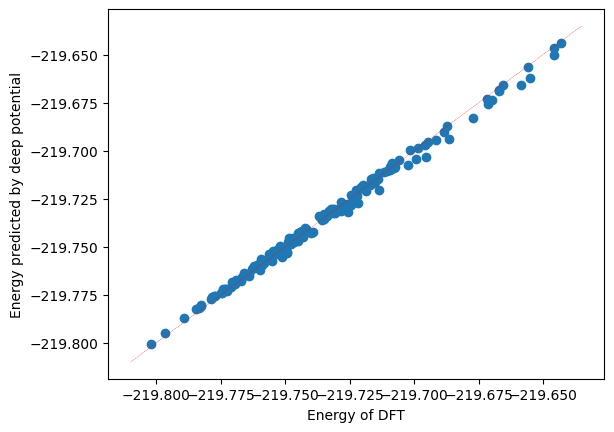

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(training_systems["energies"], predict["energies"])

x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])

plt.plot(x_range, x_range, "r--", linewidth = 0.25)
plt.xlabel("Energy of DFT")
plt.ylabel("Energy predicted by deep potential")
plt.plot()

### 7 Run MD with LAMMPS

The model can drive molecular dynamics in LAMMPS. 


In [20]:
! ls
! cd ./DeePMD-kit_Tutorial/02.lmp && cp ../01.train.finished/graph.pb ./ && tree -L 1

DeePMD-kit_Tutorial
.
├── ch4.dump
├── conf.lmp
├── graph.pb
└── in.lammps

0 directories, 4 files


Here `conf.lmp` gives the initial configuration of a gas phase methane MD simulation, and the file `in.lammps` is the lammps input script. One may check in.lammps and finds that it is a rather standard LAMMPS input file for a MD simulation, with only two exception lines:
```
pair_style  deepmd graph.pb
pair_coeff  * *
```
where the pair style deepmd is invoked and the model file `graph.pb` is provided, which means the atomic interaction will be computed by the DP model that is stored in the file `graph.pb`. 

In an environment with a compatibable version of LAMMPS, the deep potential molecular dynamics can be performed via 

```bash
lmp -i input.lammps
```

In [21]:
! cd ./DeePMD-kit_Tutorial/02.lmp && lmp -i in.lammps

This LAMMPS executable is in a conda environment, but the environment has
not been activated. Libraries may fail to load. To activate this environment
please see https://conda.io/activation.
LAMMPS (23 Jun 2022 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from /opt/deepmd-kit-2.2.1/lib/deepmd_lmp
Reading data file ...
  triclinic box = (0 0 0) to (10.114259 10.263124 10.216793) with tilt (0.036749877 0.13833062 -0.056322169)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  5 atoms
  read_data CPU = 0.003 seconds
DeePMD-kit WARNING: Environmental variable OMP_NUM_THREADS is not set. Tune OMP_NUM_THREADS for the best performance. See https://deepmd.rtfd.io/parallelism/ for more information.
Summary of lammps deepmd module ...
  >>> Info of deepmd-kit:
  installed to:       /opt/deepmd-kit-2.2.1
  source:             v2.2.1
  source branch:       HEAD
  source commit:      3ac8c

## References <a id ='references'></a>

1. https://docs.deepmodeling.com/projects/deepmd/en/master/index.html
2. https://github.com/deepmodeling/deepmd-kit 

<a href="https://bohrium.dp.tech/notebook/a1d17996148f44d09a6447dd4dd19aa6" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>